In [82]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [83]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
# Same labels will be reused throughout the program
LABELS = ['[1]Sitting-on-Bed',
          '[2]Sitting-on-Chair',
          '[3]Lying-Down',
          '[4]Ambulating']

In [84]:
def read_data(file_path):
    
    pd.options.display.float_format = '{:,.4f}'.format

    column_names = ['experiment-id',
                    'time',
                    'frontal-acceleration',
                    'vertical-acceleration',
                    'lateral-acceleration',
                    'antenna-id',
                    'RSSI',
                    'phase',
                    'frequency',
                    'label']
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)

    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
 
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))
    

# Load data set containing all the data

df = read_data('/Users/leono/Documents/MIEIC/IART/cart_tutorial/tutorials-master/test_file_S1.txt')

In [85]:
# Describe the data
show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 10
Number of rows in the dataframe: 52482



,experiment-id,time,frontal-acceleration,vertical-acceleration,lateral-acceleration,antenna-id,RSSI,phase,frequency,label
0,1,0.0000,0.2720,1.0082,-0.0821,1,-63.5000,2.4252,924.2500,1
1,1,0.5000,0.2720,1.0082,-0.0821,1,-63.0000,4.7369,921.7500,1
2,1,1.5000,0.4479,0.9164,-0.0137,1,-63.5000,3.0311,923.7500,1
3,1,1.7500,0.4479,0.9164,-0.0137,1,-63.0000,2.0371,921.2500,1
4,1,2.5000,0.3424,0.9623,-0.0593,1,-63.5000,5.8920,920.2500,1
5,1,3.2500,0.3424,0.9623,-0.0593,4,-56.5000,1.2563,924.7500,1
6,1,4.0000,0.3072,0.9967,-0.0707,1,-63.5000,3.8718,922.7500,1
7,1,5.0000,0.2720,0.9967,-0.0935,1,-64.0000,2.4943,924.2500,1
8,1,5.5000,0.2369,1.0312,-0.1277,1,-64.5000,2.0080,924.7500,1
9,1,6.0000,0.2369,1.0312,-0.1277,1,-66.0000,1.1904,925.7500,1


In [86]:
# Column labels.
# These are used only to print the tree.
header = ["experiment-id",
                    "time",
                    "frontal-acceleration",
                    "vertical-acceleration",
                    "lateral-acceleration",
                    "antenna-id",
                    "RSSI",
                    "phase",
                    "frequency",
                    "label"]

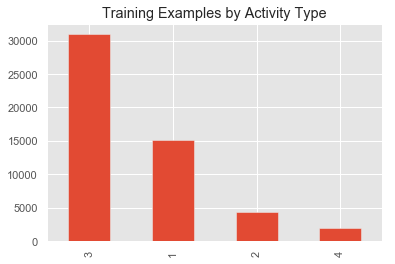

[1]Sitting-on-Bed
[2]Sitting-on-Chair
[3]Lying-Down
[4]Ambulating


In [87]:
df['label'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')

plt.show()

for i in LABELS:
    print(i)

In [108]:
X = df.values[:, 0:8]
Y = df.values[:,9]

print(Y)

#Splitting dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, shuffle=False)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 1. 1.
 1. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

In [107]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [97]:
Y_test

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [98]:
#clf_gini.predict([[4, 4, 3, 3]])
Y_pred = clf_gini.predict(X_test)
Y_pred

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [99]:
accuracy_score(Y_test,Y_pred)*100

96.30370582071069

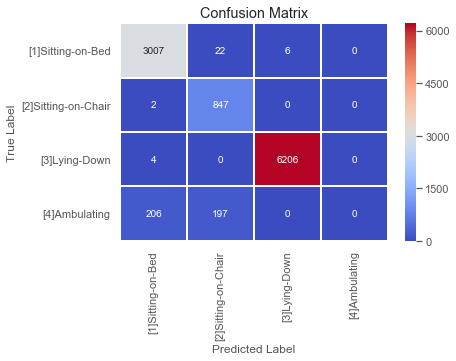

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      3035
         2.0       0.79      1.00      0.88       849
         3.0       1.00      1.00      1.00      6210
         4.0       0.00      0.00      0.00       403

   micro avg       0.96      0.96      0.96     10497
   macro avg       0.68      0.75      0.71     10497
weighted avg       0.93      0.96      0.94     10497



C:\Users\leono\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\leono\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\leono\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(Y_pred, axis=1)
#max_y_test = np.argmax(Y_test, axis=1)

show_confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))